In [247]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

In [248]:
df = pd.DataFrame()

df['x1'] = [1,2,3,4,5,6,6,7,7,8]
df['x2'] = [5,7,9,6,3,8,4,1,2,5]
df['label'] = [0,1,0,1,0,1,0,1,1,0]

In [249]:
df

,x1,x2,label
0,1,5,0
1,2,7,1
2,3,9,0
3,4,6,1
4,5,3,0
5,6,8,1
6,6,4,0
7,7,1,1
8,7,2,1
9,8,5,0


<Axes: xlabel='x1', ylabel='x2'>

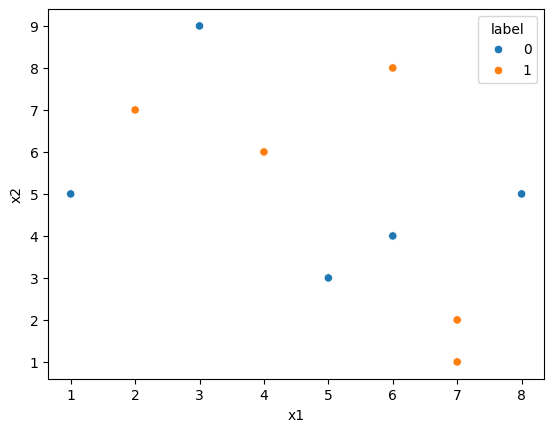

In [250]:
import seaborn as sns

sns.scatterplot(x=df['x1'], y=df['x2'], hue=df['label'])

In [251]:
df['weights'] = 1/df.shape[0]
df

,x1,x2,label,weights
0,1,5,0,0.1
1,2,7,1,0.1
2,3,9,0,0.1
3,4,6,1,0.1
4,5,3,0,0.1
5,6,8,1,0.1
6,6,4,0,0.1
7,7,1,1,0.1
8,7,2,1,0.1
9,8,5,0,0.1


In [252]:
from sklearn.tree import DecisionTreeClassifier

dt1= DecisionTreeClassifier(max_depth = 1)

x = df.iloc[:, :2]
y = df.iloc[:, 2]

dt1.fit(x, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

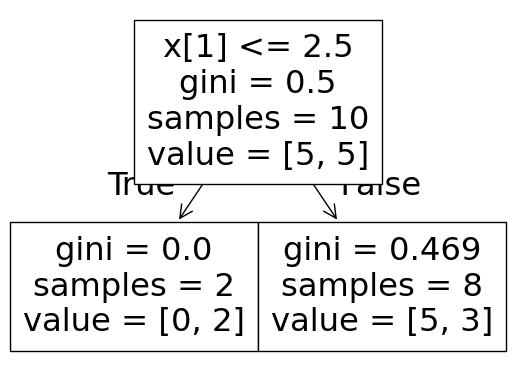

In [253]:
from sklearn.tree import plot_tree

plot_tree(dt1)


c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

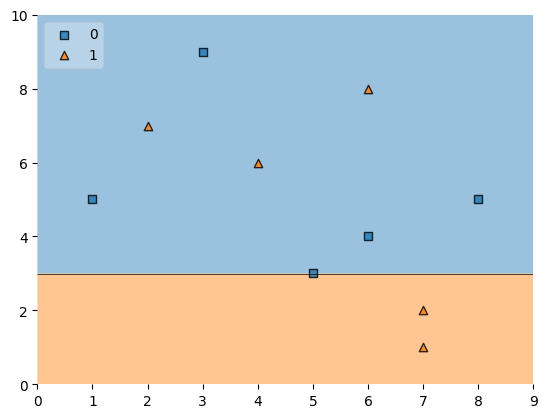

In [254]:
plot_decision_regions(x.values, y.values, clf=dt1, legend=2)

In [255]:
df['ypred'] = dt1.predict(x)
df

,x1,x2,label,weights,ypred
0,1,5,0,0.1,0
1,2,7,1,0.1,0
2,3,9,0,0.1,0
3,4,6,1,0.1,0
4,5,3,0,0.1,0
5,6,8,1,0.1,0
6,6,4,0,0.1,0
7,7,1,1,0.1,1
8,7,2,1,0.1,1
9,8,5,0,0.1,0


In [256]:
def cal_error(error):
    return 0.5*np.log((1-(error+0.000001))/(error+0.000001))

In [257]:
alpha1 = cal_error(df[df['label'] != df['ypred']]['weights'].sum())
alpha1

0.4236465492434885

In [258]:
def update_weight(row, alpha=alpha1):
    if row['label'] == row['ypred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [259]:
df['updated_weights'] = df.apply(update_weight, axis=1)
df

,x1,x2,label,weights,ypred,updated_weights
0,1,5,0,0.1,0,0.065466
1,2,7,1,0.1,0,0.152752
2,3,9,0,0.1,0,0.065466
3,4,6,1,0.1,0,0.152752
4,5,3,0,0.1,0,0.065466
5,6,8,1,0.1,0,0.152752
6,6,4,0,0.1,0,0.065466
7,7,1,1,0.1,1,0.065466
8,7,2,1,0.1,1,0.065466
9,8,5,0,0.1,0,0.065466


In [260]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()
df

,x1,x2,label,weights,ypred,updated_weights,normalized_weights
0,1,5,0,0.1,0,0.065466,0.071429
1,2,7,1,0.1,0,0.152752,0.166666
2,3,9,0,0.1,0,0.065466,0.071429
3,4,6,1,0.1,0,0.152752,0.166666
4,5,3,0,0.1,0,0.065466,0.071429
5,6,8,1,0.1,0,0.152752,0.166666
6,6,4,0,0.1,0,0.065466,0.071429
7,7,1,1,0.1,1,0.065466,0.071429
8,7,2,1,0.1,1,0.065466,0.071429
9,8,5,0,0.1,0,0.065466,0.071429


In [261]:
df['normalized_weights'].sum()

1.0

In [262]:
df['upper'] = np.cumsum(df['normalized_weights'])
df['lower'] = df['upper'] - df['normalized_weights']
df

,x1,x2,label,weights,ypred,updated_weights,normalized_weights,upper,lower
0,1,5,0,0.1,0,0.065466,0.071429,0.071429,0.000000
1,2,7,1,0.1,0,0.152752,0.166666,0.238095,0.071429
2,3,9,0,0.1,0,0.065466,0.071429,0.309524,0.238095
3,4,6,1,0.1,0,0.152752,0.166666,0.476190,0.309524
4,5,3,0,0.1,0,0.065466,0.071429,0.547619,0.476190
5,6,8,1,0.1,0,0.152752,0.166666,0.714285,0.547619
6,6,4,0,0.1,0,0.065466,0.071429,0.785714,0.714285
7,7,1,1,0.1,1,0.065466,0.071429,0.857143,0.785714
8,7,2,1,0.1,1,0.065466,0.071429,0.928571,0.857143
9,8,5,0,0.1,0,0.065466,0.071429,1.000000,0.928571


In [263]:
def new_df(df):
    indices = []

    for i in range(df.shape[0]):
        a = np.random.random()
        for ind, row in df.iterrows():
            if row['upper'] > a and a> row['lower']:
                indices.append(ind)

    
    return indices

In [264]:
indv = new_df(df)
indv

[6, 3, 3, 2, 3, 5, 0, 1, 4, 5]

In [265]:
seconddf =df.iloc[indv, [0,1,2,3]]
seconddf

,x1,x2,label,weights
6,6,4,0,0.1
3,4,6,1,0.1
3,4,6,1,0.1
2,3,9,0,0.1
3,4,6,1,0.1
5,6,8,1,0.1
0,1,5,0,0.1
1,2,7,1,0.1
4,5,3,0,0.1
5,6,8,1,0.1


In [266]:
dt2 = DecisionTreeClassifier(max_depth=1)

x = seconddf.iloc[:, :2].values
y = seconddf.iloc[:, 2].values
dt2.fit(x, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 5.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.625, 0.5, '  False')]

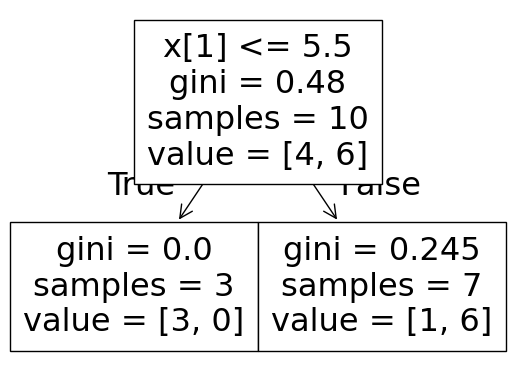

In [267]:
plot_tree(dt2)

<Axes: >

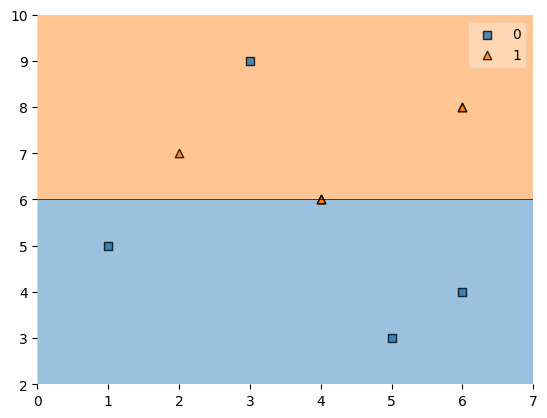

In [268]:
plot_decision_regions(x, y, clf=dt2, legend=1)

In [269]:
seconddf['ypred'] = dt2.predict(x)
seconddf

,x1,x2,label,weights,ypred
6,6,4,0,0.1,0
3,4,6,1,0.1,1
3,4,6,1,0.1,1
2,3,9,0,0.1,1
3,4,6,1,0.1,1
5,6,8,1,0.1,1
0,1,5,0,0.1,0
1,2,7,1,0.1,1
4,5,3,0,0.1,0
5,6,8,1,0.1,1


In [270]:
alpha2 = cal_error(seconddf[seconddf['label'] != seconddf['ypred']]['weights'].sum())
alpha2

1.0986067331372453

In [271]:
def update_weight(row, alpha=alpha2):
    if row['label'] == row['ypred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [272]:
seconddf['updated_weights'] = seconddf.apply(update_weight, axis=1)
seconddf

,x1,x2,label,weights,ypred,updated_weights
6,6,4,0,0.1,0,0.033334
3,4,6,1,0.1,1,0.033334
3,4,6,1,0.1,1,0.033334
2,3,9,0,0.1,1,0.299998
3,4,6,1,0.1,1,0.033334
5,6,8,1,0.1,1,0.033334
0,1,5,0,0.1,0,0.033334
1,2,7,1,0.1,1,0.033334
4,5,3,0,0.1,0,0.033334
5,6,8,1,0.1,1,0.033334


In [273]:
seconddf['normalized_weights'] = seconddf['updated_weights']/seconddf['updated_weights'].sum()
seconddf

,x1,x2,label,weights,ypred,updated_weights,normalized_weights
6,6,4,0,0.1,0,0.033334,0.055556
3,4,6,1,0.1,1,0.033334,0.055556
3,4,6,1,0.1,1,0.033334,0.055556
2,3,9,0,0.1,1,0.299998,0.499997
3,4,6,1,0.1,1,0.033334,0.055556
5,6,8,1,0.1,1,0.033334,0.055556
0,1,5,0,0.1,0,0.033334,0.055556
1,2,7,1,0.1,1,0.033334,0.055556
4,5,3,0,0.1,0,0.033334,0.055556
5,6,8,1,0.1,1,0.033334,0.055556


In [274]:
seconddf['upper'] = np.cumsum(seconddf['normalized_weights'])
seconddf['lower'] = seconddf['upper'] - seconddf['normalized_weights']
seconddf

,x1,x2,label,weights,ypred,updated_weights,normalized_weights,upper,lower
6,6,4,0,0.1,0,0.033334,0.055556,0.055556,0.000000
3,4,6,1,0.1,1,0.033334,0.055556,0.111112,0.055556
3,4,6,1,0.1,1,0.033334,0.055556,0.166668,0.111112
2,3,9,0,0.1,1,0.299998,0.499997,0.666665,0.166668
3,4,6,1,0.1,1,0.033334,0.055556,0.722221,0.666665
5,6,8,1,0.1,1,0.033334,0.055556,0.777777,0.722221
0,1,5,0,0.1,0,0.033334,0.055556,0.833332,0.777777
1,2,7,1,0.1,1,0.033334,0.055556,0.888888,0.833332
4,5,3,0,0.1,0,0.033334,0.055556,0.944444,0.888888
5,6,8,1,0.1,1,0.033334,0.055556,1.000000,0.944444


In [275]:
indv = new_df(seconddf)
indv

[2, 4, 4, 2, 2, 2, 2, 4, 3, 2]

In [276]:
thirddf =seconddf.iloc[indv, [0,1,2,3]]
thirddf

,x1,x2,label,weights
3,4,6,1,0.1
3,4,6,1,0.1
3,4,6,1,0.1
3,4,6,1,0.1
3,4,6,1,0.1
3,4,6,1,0.1
3,4,6,1,0.1
3,4,6,1,0.1
2,3,9,0,0.1
3,4,6,1,0.1


In [277]:
dt3 = DecisionTreeClassifier(max_depth=1)

x = thirddf.iloc[:, :2].values
y = thirddf.iloc[:, 2].values
dt3.fit(x, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.5\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.625, 0.5, '  False')]

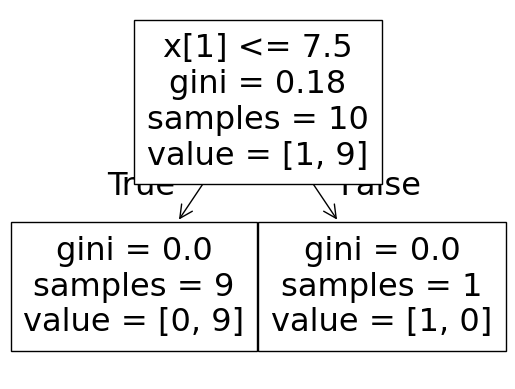

In [278]:
plot_tree(dt3)

<Axes: >

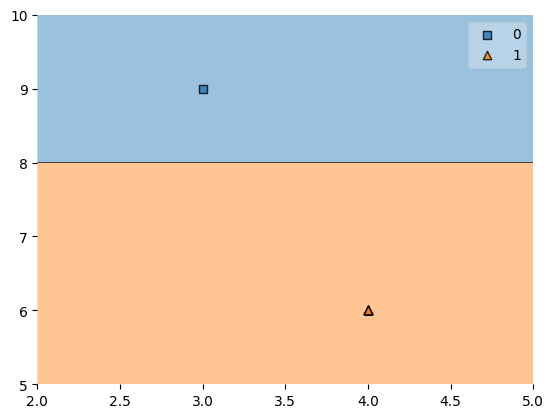

In [279]:
plot_decision_regions(x, y, clf=dt3, legend=1)

In [280]:
thirddf['ypred'] = dt3.predict(x)
thirddf

,x1,x2,label,weights,ypred
3,4,6,1,0.1,1
3,4,6,1,0.1,1
3,4,6,1,0.1,1
3,4,6,1,0.1,1
3,4,6,1,0.1,1
3,4,6,1,0.1,1
3,4,6,1,0.1,1
3,4,6,1,0.1,1
2,3,9,0,0.1,0
3,4,6,1,0.1,1


In [281]:
alpha3 = cal_error(thirddf[thirddf['label'] != thirddf['ypred']]['weights'].sum())
alpha3

6.907754778981887

In [282]:
def update_weight(row, alpha=alpha3):
    if row['label'] == row['ypred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [283]:
thirddf['updated_weights'] = thirddf.apply(update_weight, axis=1)
thirddf

,x1,x2,label,weights,ypred,updated_weights
3,4,6,1,0.1,1,0.0001
3,4,6,1,0.1,1,0.0001
3,4,6,1,0.1,1,0.0001
3,4,6,1,0.1,1,0.0001
3,4,6,1,0.1,1,0.0001
3,4,6,1,0.1,1,0.0001
3,4,6,1,0.1,1,0.0001
3,4,6,1,0.1,1,0.0001
2,3,9,0,0.1,0,0.0001
3,4,6,1,0.1,1,0.0001


In [284]:
thirddf['normalized_weights'] = thirddf['updated_weights']/thirddf['updated_weights'].sum()
thirddf

,x1,x2,label,weights,ypred,updated_weights,normalized_weights
3,4,6,1,0.1,1,0.0001,0.1
3,4,6,1,0.1,1,0.0001,0.1
3,4,6,1,0.1,1,0.0001,0.1
3,4,6,1,0.1,1,0.0001,0.1
3,4,6,1,0.1,1,0.0001,0.1
3,4,6,1,0.1,1,0.0001,0.1
3,4,6,1,0.1,1,0.0001,0.1
3,4,6,1,0.1,1,0.0001,0.1
2,3,9,0,0.1,0,0.0001,0.1
3,4,6,1,0.1,1,0.0001,0.1


In [285]:
thirddf['upper'] = np.cumsum(thirddf['normalized_weights'])
thirddf['lower'] = thirddf['upper'] - thirddf['normalized_weights']
thirddf

,x1,x2,label,weights,ypred,updated_weights,normalized_weights,upper,lower
3,4,6,1,0.1,1,0.0001,0.1,0.1,0.0
3,4,6,1,0.1,1,0.0001,0.1,0.2,0.1
3,4,6,1,0.1,1,0.0001,0.1,0.3,0.2
3,4,6,1,0.1,1,0.0001,0.1,0.4,0.3
3,4,6,1,0.1,1,0.0001,0.1,0.5,0.4
3,4,6,1,0.1,1,0.0001,0.1,0.6,0.5
3,4,6,1,0.1,1,0.0001,0.1,0.7,0.6
3,4,6,1,0.1,1,0.0001,0.1,0.8,0.7
2,3,9,0,0.1,0,0.0001,0.1,0.9,0.8
3,4,6,1,0.1,1,0.0001,0.1,1.0,0.9


In [286]:
indv = new_df(thirddf)
indv

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [287]:
p1 = dt1.predict(np.array([7,1]).reshape(1, 2))[0]
p2 = dt2.predict(np.array([7,1]).reshape(1, 2))[0]
p3 = dt3.predict(np.array([7,1]).reshape(1, 2))[0]

print(p1, p2, p3)

1 0 1


c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [289]:
print(p1, alpha1)
print(p2, alpha2)
print(p3, alpha3)

1 0.4236465492434885
0 1.0986067331372453
1 6.907754778981887


In [290]:
print(np.sign(alpha1*1 + alpha2*-1 + alpha3*1))

1.0
